

## Details about the input data

I will be using an LSTM on the data 



In [ ]:
# All Includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics

import os

In [ ]:
#LABELS = ["Bump ", "Crack ", "DirtRoad ", "Idle ", "PavedRoad ", "Pothole ", "PotholeMiss ", "RoughRoad ", "SpeedBump "] 
# Output classes to learn how to classify
LABELS = [
    "WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"
]

In [ ]:
DATA_PATH = "data/"
DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"



In [ ]:
# Input Data 

training_data_count = len(X_train)  #  training series (with 50% overlap between each serie)
test_data_count = len(X_test)  #  testing series
n_steps = len(X_train[0])  #  timesteps per series
n_input = len(X_train[0][0])  #  input parameters per timestep


# LSTM Neural Network's internal structure
n_hidden = 7 # Hidden layer num of features
n_classes = 5 # Total classes 
# Training 
learning_rate = 0.001   # 0.003
lambda_loss_amount = 0.01
training_iters = training_data_count * 300  # Loop 300 times on the dataset
batch_size = 264    # 20 for batch size   #smaller batch size more change of updating the network  i one epoach
display_iter = 100  # To show test set accuracy during training




Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 561, 1) (2947, 6) -0.509257 0.525582
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [ ]:



from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

directory_for_the_data=r"C:/Users/Varun_Garg/Desktop/HW1_HA/HA_hw_4/data/"

def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset_acc_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    #filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


def load_dataset_gyro_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()

    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy


def load_acc_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_acc_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_acc_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy


def load_gyro_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_gyro_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_gyro_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy









def plot_train_and_val(mymodel):
  plt.plot(mymodel.history['acc'])
  #plt.plot(mymodel.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(mymodel.history['loss'])
  plt.plot(mymodel.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

    
    
  


In [ ]:
# Task 1 output 1
#oOutput 1: 4 class problems with activities: Walking, Sitting, Standing and Laying. Merge all kind of walking activities into a composite activity “walking”. The problem is categorical


def load_dataset_4class(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y

    trainy_4_output = trainy
    for i in range (len(trainy_4_output)):
        if trainy_4_output[i]==4:
            trainy_4_output[i]=3
        elif trainy_4_output[i]==5:
            trainy_4_output[i]=3
    trainy=trainy_4_output
    
    testy_4_output = testy
    for i in range (len(testy_4_output)):
        if testy_4_output[i]==4:
            testy_4_output[i]=3
        elif testy_4_output[i]==5:
            testy_4_output[i]=3
    testy=testy_4_output
    
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy


trainX, trainy, testX, testy = load_dataset_4class(prefix=directory_for_the_data)





(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 4) (2947, 128, 9) (2947, 4)


In [ ]:
testy.shape

(2947, 4)

In [ ]:
# Task 1 output 1
def load_acc_dataset_4class(prefix=''):
    # load all train
    trainX, trainy = load_dataset_acc_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_acc_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y

    trainy_4_output = trainy
    for i in range (len(trainy_4_output)):
        if trainy_4_output[i]==4:
            trainy_4_output[i]=3
        elif trainy_4_output[i]==5:
            trainy_4_output[i]=3
    trainy=trainy_4_output
    
    testy_4_output = testy
    for i in range (len(testy_4_output)):
        if testy_4_output[i]==4:
            testy_4_output[i]=3
        elif testy_4_output[i]==5:
            testy_4_output[i]=3
    testy=testy_4_output
    
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy


trainX, trainy, testX, testy = load_acc_dataset_4class(prefix=directory_for_the_data)







(7352, 128, 6) (7352, 1)
(2947, 128, 6) (2947, 1)
(7352, 128, 6) (7352, 4) (2947, 128, 6) (2947, 4)


In [ ]:
testy.shape

(2947, 4)

In [ ]:
# Task 1 output 1
def load_gyro_dataset_4class(prefix=''):
    # load all train
    trainX, trainy = load_dataset_gyro_group('train', prefix + 'HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_gyro_group('test', prefix + 'HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y

    trainy_4_output = trainy
    for i in range (len(trainy_4_output)):
        if trainy_4_output[i]==4:
            trainy_4_output[i]=3
        elif trainy_4_output[i]==5:
            trainy_4_output[i]=3
    trainy=trainy_4_output
    
    testy_4_output = testy
    for i in range (len(testy_4_output)):
        if testy_4_output[i]==4:
            testy_4_output[i]=3
        elif testy_4_output[i]==5:
            testy_4_output[i]=3
    testy=testy_4_output
    
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy


trainX, trainy, testX, testy = load_gyro_dataset_4class(prefix=directory_for_the_data)







(7352, 128, 3) (7352, 1)
(2947, 128, 3) (2947, 1)
(7352, 128, 3) (7352, 4) (2947, 128, 3) (2947, 4)


In [ ]:
testy.shape

(2947, 4)

In [ ]:
#Task 1 output 2 
# oOutput 2: Replace categorical classes with the following values to make it a regression problem of mobility score

In [ ]:
def load_dataset_mobility_score(prefix=''):
    trainX, trainy = load_dataset_group('train', prefix + 'HAR Dataset/')
    testX, testy = load_dataset_group('test', prefix + 'HAR Dataset/')
    trainy = trainy - 1
    testy = testy - 1
    return trainX, trainy, testX, testy



In [ ]:
trainX, trainy_non_categorical, testX, testy_non_categorical = load_dataset_mobility_score(prefix=directory_for_the_data)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 1) (2947, 128, 9) (2947, 1)


In [ ]:
len(trainy_non_categorical)

7352

In [ ]:
trainy_model2 =trainy_non_categorical
#trainy[1:100]


for i in range (len(trainy_model2)):
    if trainy_model2[i]==2:
        trainy_model2[i]=1
    elif trainy_model2[i]==3:
        trainy_model2[i]=2
    elif trainy_model2[i]==4:
        trainy_model2[i]=3


In [ ]:
testy_model2 =testy_non_categorical
#testy[1:100]


for i in range (len(testy_model2)):
    if testy_model2[i]==2:
        testy_model2[i]=1
    elif testy_model2[i]==3:
        testy_model2[i]=2
    elif testy_model2[i]==4:
        testy_model2[i]=3

In [ ]:
def plot_train_and_val(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()




In [ ]:
trainX, trainy, testX, testy = load_dataset_4class(prefix=directory_for_the_data)
trainX.shape

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 4) (2947, 128, 9) (2947, 4)


(7352, 128, 9)

In [ ]:
# MULTI input OUTPUT MODEL


import keras
from keras.layers import Input, Dense , Concatenate
from keras.models import Model
# This returns a tensor
inputs  = Input(shape=(128, 9))
inputs2 = Input(shape=(128, 9))
# a layer instance is callable on a tensor, and returns a tensor
lstm_1 = LSTM(100,  activation='relu')(inputs)
lstm_2 = LSTM(100,  activation='relu')(inputs2)
Merge2 =  keras.layers.concatenate([lstm_1, lstm_2])
Rvec =    keras.layers.RepeatVector(3)(Merge2)
lstm_m_1 = LSTM(100, activation='relu', return_sequences=True)(Rvec)
lstm_m_2 = LSTM(100,  activation='relu', return_sequences=True)(lstm_m_1)
lstm_o_1= LSTM(100, activation='relu')(lstm_m_2)
lstm_o_2= LSTM(100, activation='relu')(lstm_m_2)

output1= Dense(4, activation="softmax", name = 'out1')(lstm_o_1)
output2= Dense(1, activation="softmax", name = 'out2')(lstm_o_2)

model = Model(inputs=[inputs, inputs2] , outputs=[output1, output2])
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 128, 9)       0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 128, 9)       0                                            
__________________________________________________________________________________________________
lstm_165 (LSTM)                 (None, 100)          44000       input_28[0][0]                   
__________________________________________________________________________________________________
lstm_166 (LSTM)                 (None, 100)          44000       input_29[0][0]                   
__________________________________________________________________________________________________
concatenat

In [ ]:
m=256
n_epoch =25
model.compile(optimizer ='adam', loss =['categorical_crossentropy','mse'], loss_weights = [1.0,0.5], metrics= ['accuracy'])

In [ ]:
#history = model.fit([X_train, X_train], [y_train,y_train], epochs=1, batch_size=2000)
#history = model.fit([trainX, trainX], [trainy,trainy], epochs=16, batch_size=200, validation_data=([testX,testX ],[testy,testy]))

#history = model.fit([trainX, trainX], [trainy,trainy], epochs=16, batch_size=200, validation_split=0.33)
history = model.fit([trainX, trainX], [trainy,trainy_model2], epochs=16, batch_size=200, validation_split=0.33)

Train on 4925 samples, validate on 2427 samples
Epoch 1/16
4925/4925 [==============================] - 70s 14ms/step - loss: 2.9947 - out1_loss: 1.3100 - out2_loss: 3.3693 - out1_acc: 0.5377 - out2_acc: 0.4510 - val_loss: 8.0724 - val_out1_loss: 6.3175 - val_out2_loss: 3.5097 - val_out1_acc: 0.5517 - val_out2_acc: 0.4631
Epoch 2/16
4925/4925 [==============================] - 19s 4ms/step - loss: 4.2372 - out1_loss: 2.5525 - out2_loss: 3.3693 - out1_acc: 0.4745 - out2_acc: 0.4510 - val_loss: 8.4927 - val_out1_loss: 6.7379 - val_out2_loss: 3.5097 - val_out1_acc: 0.2279 - val_out2_acc: 0.4631
Epoch 3/16
4925/4925 [==============================] - 18s 4ms/step - loss: 6.3194 - out1_loss: 4.6347 - out2_loss: 3.3693 - out1_acc: 0.4173 - out2_acc: 0.4510 - val_loss: 2.5343 - val_out1_loss: 0.7794 - val_out2_loss: 3.5097 - val_out1_acc: 0.6432 - val_out2_acc: 0.4631
Epoch 4/16
4925/4925 [==============================] - 16s 3ms/step - loss: 2.2840 - out1_loss: 0.5993 - out2_loss: 3.3693 - 

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_out1_loss', 'val_out2_loss', 'val_out1_acc', 'val_out2_acc', 'loss', 'out1_loss', 'out2_loss', 'out1_acc', 'out2_acc'])


In [ ]:
def plot_train_and_val_model1(history):
  plt.plot(history.history['out1_acc'])
  plt.plot(history.history['val_out1_acc'])
  plt.title('model 1 accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['out1_loss'])
  plt.plot(history.history['val_out1_loss'])
  plt.title('model 1 loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

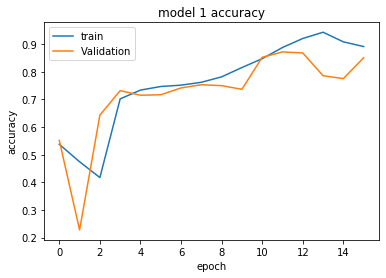

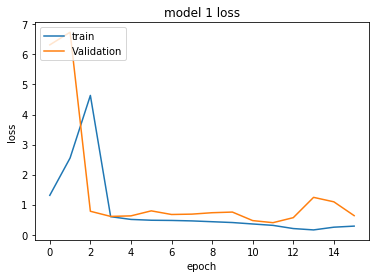

In [ ]:
plot_train_and_val_model1(history)


In [ ]:
def plot_train_and_val_model2(history):
  plt.plot(history.history['out2_acc'])
  plt.plot(history.history['val_out2_acc'])
  plt.title('model 2 accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['out2_loss'])
  plt.plot(history.history['val_out2_loss'])
  plt.title('model 2 loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

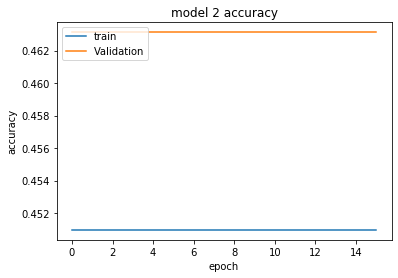

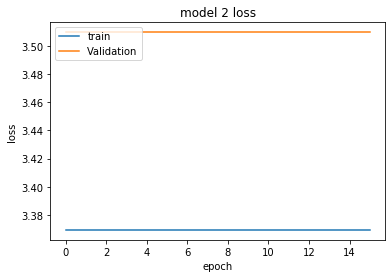

In [ ]:
plot_train_and_val_model2(history)


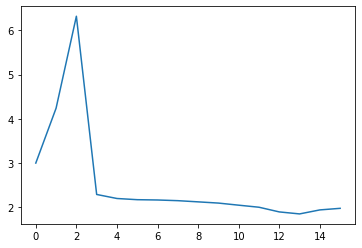

In [ ]:
plt.plot(history.history['loss'])


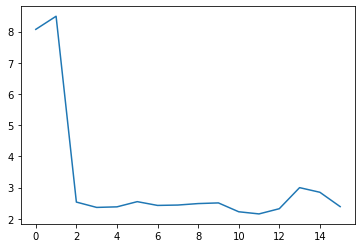

In [ ]:
plt.plot(history.history['val_loss'])


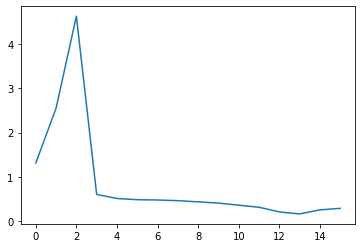

In [ ]:
#  loss 1
plt.plot(history.history['out1_loss'])

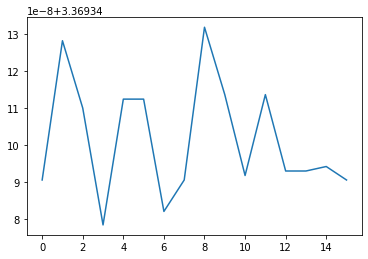

In [ ]:
#  loss 2

plt.plot(history.history['out2_loss'])



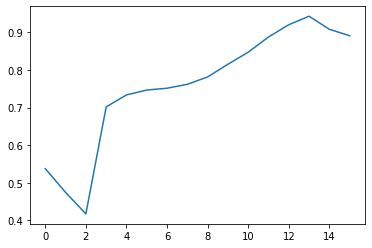

In [ ]:
# Accuracy curve model 1
plt.plot(history.history['out1_acc'])


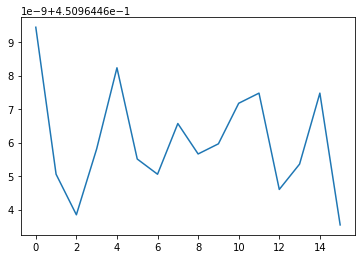

In [ ]:
# Accuracy curve model 2
plt.plot(history.history['out2_acc'])


In [ ]:
testX.shape


(2947, 128, 9)

In [ ]:
trainy_model2.shape

(7352, 1)

In [ ]:
#TASK 3 CODE

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict([testX,testX])




In [ ]:
np.shape(Y_pred[0])

(2947, 4)

In [ ]:
one_hot_output =Y_pred[0]
one_hot_output[1]

array([1.7211009e-07, 2.9566111e-18, 1.5721695e-13, 9.9999988e-01],
      dtype=float32)

In [ ]:
one_hot_o = np.argmax(one_hot_output,  axis=1)

In [ ]:
one_hot_o.shape

(2947,)

In [ ]:
#cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
testy_non_categorical.shape

(2947, 1)

In [ ]:
cm = confusion_matrix(testy_non_categorical,one_hot_o)

In [ ]:
print(cm)

[[437   3  27  29   0   0]
 [ 24 342 105   0   0   0]
 [153  33 234   0   0   0]
 [ 18   0   0 473   0   0]
 [  9   0   0 523   0   0]
 [  7  20  12 498   0   0]]


In [ ]:
#get MSE and you are done

In [ ]:

from sklearn.metrics import mean_squared_error 
model_out_mobility_score = Y_pred[1]
model_out_mobility_score[1:200]
print(model_out_mobility_score.shape)
print(testy_model2.shape)
#mean_squared_error(Y_true,Y_pred) 
print('mean_squared_error')
mean_squared_error(testy_model2,model_out_mobility_score) 
# use this ----testy_model2



(2947, 1)
(2947, 1)
mean_squared_error


3.2643366135052596

In [ ]:
# there is more code below for task 4 an